### Detecting Fraud Calls vis-à-vis Natural Language Processing

AUTHOR:  Anurag Dutta (anuragdutta.research@gmail.com)

CREATED: 2022-12-26 00:40:00

DATASET: Private

### Import the Dataset

In [64]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import recall_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import plot_precision_recall_curve
import seaborn as sn
data = pd.read_csv("FraudCallDataset.csv", sep=',', names=['LABEL', 'FEATURE'])

### Visualize the Data

In [65]:
data.head()

,LABEL,FEATURE
0,fraud,"hello, i m bank manager of SBI, ur debit card ..."
1,fraud,Todays Vodafone numbers ending with 4882 are s...
2,normal,Please don't say like that. Hi hi hi
3,normal,Thank you!
4,normal,Oh that was a forwarded message. I thought you...


In [66]:
data.tail()

,LABEL,FEATURE
5920,fraud,to get 1000 INR voucher please call on 8898655...
5921,fraud,to get free access of google cloud account hit...
5922,fraud,to get free AWS cloud account hit on given mes...
5923,fraud,to get free access of Microsoft Azure hit on g...
5924,fraud,"hello sir, we are from your bank have you fill..."


### Data Preprocessing

In [67]:
ps = WordNetLemmatizer()
cv = TfidfVectorizer(max_features=2000)

### Modelling (Gaussian Naive Bayes)

Accuracy:  0.8514767932489451
Recall:  0.8499525166191833


C:\Users\Anurag Dutta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


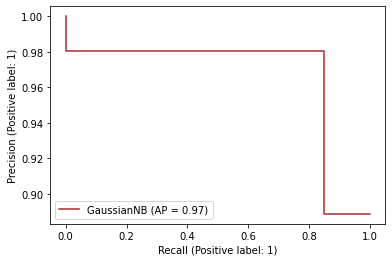

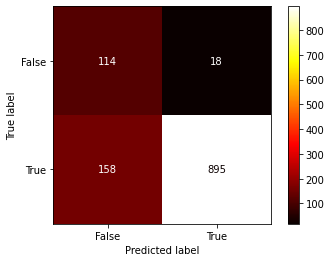

In [68]:
def remove_digit(data) :
    corpos = []
    for i in range(0, len(data)) :
        review = re.sub('[^a-zA-Z]', ' ', data['FEATURE'][i])
        review = review.lower()
        review = review.split()
        review = [ps.lemmatize(word) for word in review if word not in stopwords.words('english')]
        review = ' '.join(review)
        corpos.append(review)
    return corpos

def detect_model(corpos, data):
    x = cv.fit_transform(corpos).toarray()
    y = pd.get_dummies(data['LABEL'])
    y = y.iloc[:, 1].values
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
    fraud_detect = GaussianNB().fit(x_train, y_train)
    y_ped = fraud_detect.predict(x_test)
    cong_m = confusion_matrix(y_test, y_ped)
    acc = accuracy_score(y_test, y_ped)
    recall = recall_score(y_test,y_ped)
    print("Accuracy: ", acc)
    print("Recall: ", recall)
    disp = plot_precision_recall_curve(fraud_detect, x_test, y_test, color = 'brown')
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cong_m, display_labels = [False, True])
    cm_display.plot(cmap='hot')
    plt.show()
    return fraud_detect
    
proper_list = remove_digit(data)
model = detect_model(proper_list, data)

### Modelling (Support Vector Machine)

Accuracy:  0.979746835443038
Recall:  0.9981006647673314


C:\Users\Anurag Dutta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


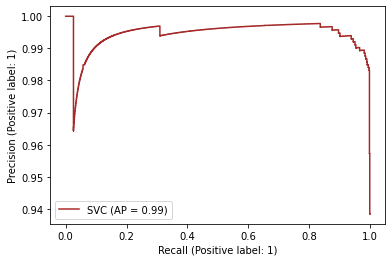

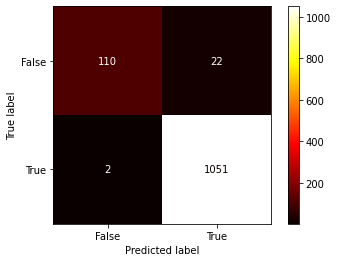

In [69]:
def remove_digit(data) :
    corpos = []
    for i in range(0, len(data)) :
        review = re.sub('[^a-zA-Z]', ' ', data['FEATURE'][i])
        review = review.lower()
        review = review.split()
        review = [ps.lemmatize(word) for word in review if word not in stopwords.words('english')]
        review = ' '.join(review)
        corpos.append(review)
    return corpos

def detect_model(corpos, data):
    x = cv.fit_transform(corpos).toarray()
    y = pd.get_dummies(data['LABEL'])
    y = y.iloc[:, 1].values
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
    fraud_detect = SVC().fit(x_train, y_train)
    y_ped = fraud_detect.predict(x_test)
    cong_m = confusion_matrix(y_test, y_ped)
    acc = accuracy_score(y_test, y_ped)
    recall = recall_score(y_test,y_ped)
    print("Accuracy: ", acc)
    print("Recall: ", recall)
    disp = plot_precision_recall_curve(fraud_detect, x_test, y_test, color = 'brown')
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cong_m, display_labels = [False, True])
    cm_display.plot(cmap='hot')
    plt.show()
    return fraud_detect
    
proper_list = remove_digit(data)
model = detect_model(proper_list, data)

### Modelling (k - Nearest Neighbours)

Accuracy:  0.9324894514767933
Recall:  0.9990503323836657


C:\Users\Anurag Dutta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


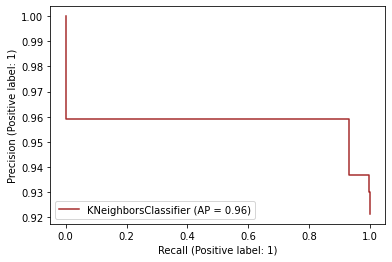

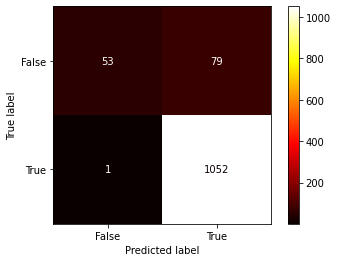

In [70]:
def remove_digit(data) :
    corpos = []
    for i in range(0, len(data)) :
        review = re.sub('[^a-zA-Z]', ' ', data['FEATURE'][i])
        review = review.lower()
        review = review.split()
        review = [ps.lemmatize(word) for word in review if word not in stopwords.words('english')]
        review = ' '.join(review)
        corpos.append(review)
    return corpos

def detect_model(corpos, data):
    x = cv.fit_transform(corpos).toarray()
    y = pd.get_dummies(data['LABEL'])
    y = y.iloc[:, 1].values
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
    fraud_detect = KNeighborsClassifier().fit(x_train, y_train)
    y_ped = fraud_detect.predict(x_test)
    cong_m = confusion_matrix(y_test, y_ped)
    acc = accuracy_score(y_test, y_ped)
    recall = recall_score(y_test,y_ped)
    print("Accuracy: ", acc)
    print("Recall: ", recall)
    disp = plot_precision_recall_curve(fraud_detect, x_test, y_test, color = 'brown')
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cong_m, display_labels = [False, True])
    cm_display.plot(cmap='hot')
    plt.show()
    return fraud_detect
    
proper_list = remove_digit(data)
model = detect_model(proper_list, data)

### Modelling (Random Forest)

Accuracy:  0.9789029535864979
Recall:  0.9971509971509972


C:\Users\Anurag Dutta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


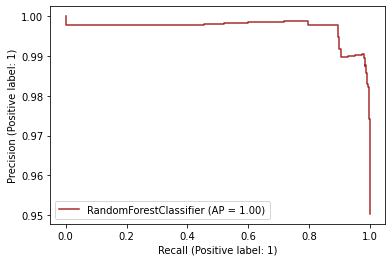

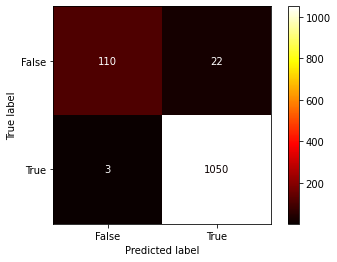

In [71]:
def remove_digit(data) :
    corpos = []
    for i in range(0, len(data)) :
        review = re.sub('[^a-zA-Z]', ' ', data['FEATURE'][i])
        review = review.lower()
        review = review.split()
        review = [ps.lemmatize(word) for word in review if word not in stopwords.words('english')]
        review = ' '.join(review)
        corpos.append(review)
    return corpos

def detect_model(corpos, data):
    x = cv.fit_transform(corpos).toarray()
    y = pd.get_dummies(data['LABEL'])
    y = y.iloc[:, 1].values
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
    fraud_detect = RandomForestClassifier().fit(x_train, y_train)
    y_ped = fraud_detect.predict(x_test)
    cong_m = confusion_matrix(y_test, y_ped)
    acc = accuracy_score(y_test, y_ped)
    recall = recall_score(y_test,y_ped)
    print("Accuracy: ", acc)
    print("Recall: ", recall)
    disp = plot_precision_recall_curve(fraud_detect, x_test, y_test, color = 'brown')
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cong_m, display_labels = [False, True])
    cm_display.plot(cmap='hot')
    plt.show()
    return fraud_detect
    
proper_list = remove_digit(data)
model = detect_model(proper_list, data)